In [1]:
%matplotlib inline 

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


### Rework!

#### Here we define the corresponding dictionaries containing the information of the pulses

In [27]:
Rabi={
    'Amplitude' : 4 ,
    'Start Duration' : 5,
    'End Duration': 5,
    'Start time' : 0,
    'End time': 0,
    'Sweep time': 0
}


In [4]:
Probe1={
    'Amplitude' : 2 ,
    'Start Duration' : 7,
    'End Duration': 5 ,
    'Start time' : 0,
    'End time': 20,
    'Sweep time': 1
}

In [5]:
Probe2={
    'Amplitude' : 7 ,
    'Start Duration' : 3,
    'End Duration': 20 ,
    'Start time' : 9,
    'End time': 11,
    'Sweep time': 1
}



## Different Pulse schemes given by dictionaries lists, contaning differnt pulses.

In [25]:
Pulses_List3=[Rabi,Probe1,Probe2];
Pulses_List=[Rabi,Probe1];
Pulses_List2=[Rabi,Probe2];

## This one just gives the pulse scheme define by the parameters of the pulses given at it dictionaries, at their 'Starting time' and with their 'Start Duration'

In [9]:
def Pl(PulList,time):
    """Pulse generating function, directly from the specified information given by it's corresponding dictionary, stored in the list PulList,at a time interval given by time"""
    pl=np.zeros((len(PulList),len(time))) 
    for i in range(0,len(PulList)):
        pl[i]=[PulList[i]['Amplitude'] * (  PulList[i]['Start time'] <=  t <= PulList[i]['Start Duration'] + PulList[i]['Start time']) for t in time ]
    y=np.zeros(len(pl[0]))
    for i in range(0,len(pl)):
        y += pl[i]
    return y

## Time interval for now:

In [10]:
trog=np.linspace(-1e-10,50,1000)

## Some tests

In [11]:
a=Pl(Pulses_List3,trog)

In [12]:
b=Pl(Pulses_List,trog)

In [13]:
c=Pl(Pulses_List2,trog)

Text(0.5, 1.0, 'Pulse Scheme from Pulses_List3, without Sweeping ')

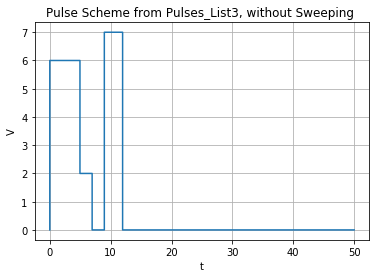

In [29]:
%matplotlib inline

fig,ax= plt.subplots()



ax.grid(True)
plt.step(trog,a)
ax.set_ylabel('V')
ax.set_xlabel('t')
ax.set_title('Pulse Scheme from Pulses_List3, without Sweeping ')

#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

### Question: Plotting with plot or step?

# Now the sweeping function:
It does not call the Pulse generating function, but it does the same thing, maybe I should rework it a little bit in order to just call that function and have a shorter code

In [19]:
def Sweept(PulList,N,n,time):
    """This function calculates an array of the pulse scheme given by the Dictionary List PulList, over the given time interval """
    """ it  uses the number of points N to calculate the time step of the sweeping, and gives the pulse scheme at time step n, n shold be smaller or equal to N """
    pl1=np.zeros((len(PulList),len(time)))
    for i in range(0,len(PulList)):
        if PulList[i]['Sweep time'] == 0:
            pl1[i]=np.array([ PulList[i]['Amplitude'] * (  PulList[i]['Start time'] <=  t <= PulList[i]['Start Duration'] + PulList[i]['Start time']) for t in time ])
        if PulList[i]['Sweep time'] == 1:
            dt=(PulList[i]['End time'] - PulList[i]['Start time'])/N
            if n==0:
                pl1[i]=np.array([ PulList[i]['Amplitude'] * (  PulList[i]['Start time'] <=  t <= PulList[i]['Start Duration'] + PulList[i]['Start time']) for t in time ])
            else:
                pl1[i]=np.array([ PulList[i]['Amplitude'] * (  n*dt <=  t <= PulList[i]['End Duration'] + n*dt) for t in time ])
    y=np.zeros(len(pl1[0]))
    for i in range(0,len(pl1)):
        y += pl1[i]
    return y
    

Text(0.5, 1.0, ' Pulse Scheme from Pulses_List, at sweeping time n=50 ')

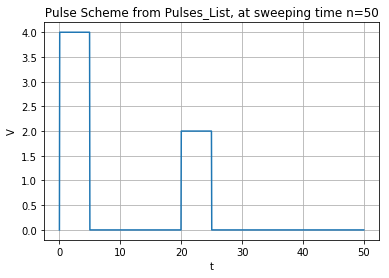

In [30]:
khe=Sweept(Pulses_List,50,50,trog); #different time step of the sweeping given by n, it should be n <= N in order to finish at 'End time'
%matplotlib inline

fig,ax= plt.subplots()



ax.grid(True)
plt.plot(trog,khe)
ax.set_ylabel('V')
ax.set_xlabel('t')
ax.set_title(' Pulse Scheme from Pulses_List, at sweeping time n=50 ')

#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

## to do: Implement the sweeping with respect to the duration: